## Preliminary Code

The needed libaries are imported, visualization conventions are specified, the data is read and stored in a dataframe, and some initial analyses of the data are carried out.

In [313]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

In [314]:
plt.style.use('seaborn-darkgrid')

In [315]:
df = pd.read_csv('suiciderates.csv')

In [316]:
df.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

In [317]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

## Data Preparation

The distribution of null values in the dataset is examined.

In [318]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

<b>Null values:</b> The "HDI per year" column contains null values, making it subject to removal. Since an HDI value of 0 is not equivalent to null (i.e., an HDI of 0 indicates abysmal living conditions, which may not be true for the entries with null HDI values), a buffer value cannot be used to resolve the issue. Thus, the HDI column is removed from the dataframe. The removal of the entire column was chosen over the removal of null values as removing the rows with null values may affect analyses using other columns (e.g., for countries with fewer reported HDIs, their total numbers of suicides will also decrease). While this prevents correlations involving the HDI values to be made, this preserves the remaining columns and allows for more accurate correlations between them.

In [319]:
clean_df = df.drop(['HDI for year'], axis = 1)

<b>Column names:</b> Before continuing with the data cleaning, the columns of the dataframe are renamed in order to facilitate better data manipulation and visualizations.

In [320]:
clean_df.columns = ['Country', 'Year', 'Sex', 'Age Range', 'Total Suicides', 'Population', 'Average Suicides', 'Country-Year', 'GDP', 'GDP Per Capita', 'Generation']

<b>Numerical values:</b> Despite having numerical values, the former "GDP per year ($)" column (renamed to "GDP") has object data types. To facilitate better data analyses, the values of this column are changed to floating point values.

In [322]:
clean_df['GDP'] = clean_df['GDP'].str.replace(',', '').astype(float)

Next, the unique values of the remaining columns are checked for encoding errors or obvious outliers, using the following statements:

In [324]:
clean_df['Country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [325]:
clean_df['Year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

In [326]:
clean_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [327]:
clean_df['Age Range'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [328]:
clean_df['Country-Year'].unique()

array(['Albania1987', 'Albania1988', 'Albania1989', ..., 'Uzbekistan2012',
       'Uzbekistan2013', 'Uzbekistan2014'], dtype=object)

In [329]:
clean_df['Generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

Outliers and potential errors for the numerical data (i.e., "Total Suicides", "Population", "Average Suicides", "GDP", and "GDP Per Capita") are checked from the statistical description of the dataset. Though the entries under the "Year" column are also numerical, these are not used as numerical values in the data analysis and visualization.

In [331]:
clean_df.describe()

,Year,Total Suicides,Population,Average Suicides,GDP,GDP Per Capita
count,"27,820.00","27,820.00","27,820.00","27,820.00","27,820.00","27,820.00"
mean,"2,001.26",242.57,"1,844,793.62",12.82,"445,580,969,025.73","16,866.46"
std,8.47,902.05,"3,911,779.44",18.96,"1,453,609,985,940.92","18,887.58"
min,"1,985.00",0.00,278.00,0.00,"46,919,625.00",251.00
25%,"1,995.00",3.00,"97,498.50",0.92,"8,985,352,832.00","3,447.00"
50%,"2,002.00",25.00,"430,150.00",5.99,"48,114,688,201.00","9,372.00"
75%,"2,008.00",131.00,"1,486,143.25",16.62,"260,202,429,150.00","24,874.00"
max,"2,016.00","22,338.00","43,805,214.00",224.97,"18,120,714,000,000.00","126,352.00"


The only notable possible outlier values are the minimum values for "Total Suicides" and "Average Suicides"; however, it is possible for there to be no suicides for a given subgroup. Thus, these values are not regarded as outliers and are retained in the dataset.

<b>Duplicate columns:</b> As seen from the earlier inspection of unique values, the column "Country-Year" is a combination of the first two columns of the dataframe (i.e., "Country" and "Year"); thus, retaining both the first two columns and the "Country-Year" column is redundant. Since retaining the first two columns allows for more efficient data manipulation, the "Country-Year" column is removed from the dataset.

In [332]:
final_df = clean_df.drop(['Country-Year'], axis = 1)

## Data Analysis

For a preliminary descriptive analysis, the shape of the dataframe and the column names are examined (additional analyses that have been done as part of the data preparation stage are omitted to avoid redundancy). 

In [333]:
final_df.shape

(27820, 10)

After the data preparation phase, the dataframe is composed of over 27000 rows and 10 columns.

In [334]:
final_df.columns

Index(['Country', 'Year', 'Sex', 'Age Range', 'Total Suicides', 'Population',
       'Average Suicides', 'GDP', 'GDP Per Capita', 'Generation'],
      dtype='object')

The data in the set (as specified by the column names) includes the names of countries, the years, sexes, and age ranges of the subgroups being described, the number of suicides belonging to the subgroup within the given year, the total population of the subgroup, the number of suicides for every 100000 people in the subgroup (likely computed from the number of suicides and population of the subgroup), the GDP and GDP per capita of the subgroup during the given year, and the generation to which the subgroup belongs.

First, the total number of suicides for each country is examined.

In [335]:
final_df.groupby('Country').aggregate({"Total Suicides":['sum']})

,Total Suicides
,sum
Country,
Albania,1970
Antigua and Barbuda,11
Argentina,82219
Armenia,1905
Aruba,101
...,...
United Arab Emirates,622
United Kingdom,136805


The data is displayed as a simple bar graph to better facilitate the analysis.

Text(0, 0.5, 'Country')

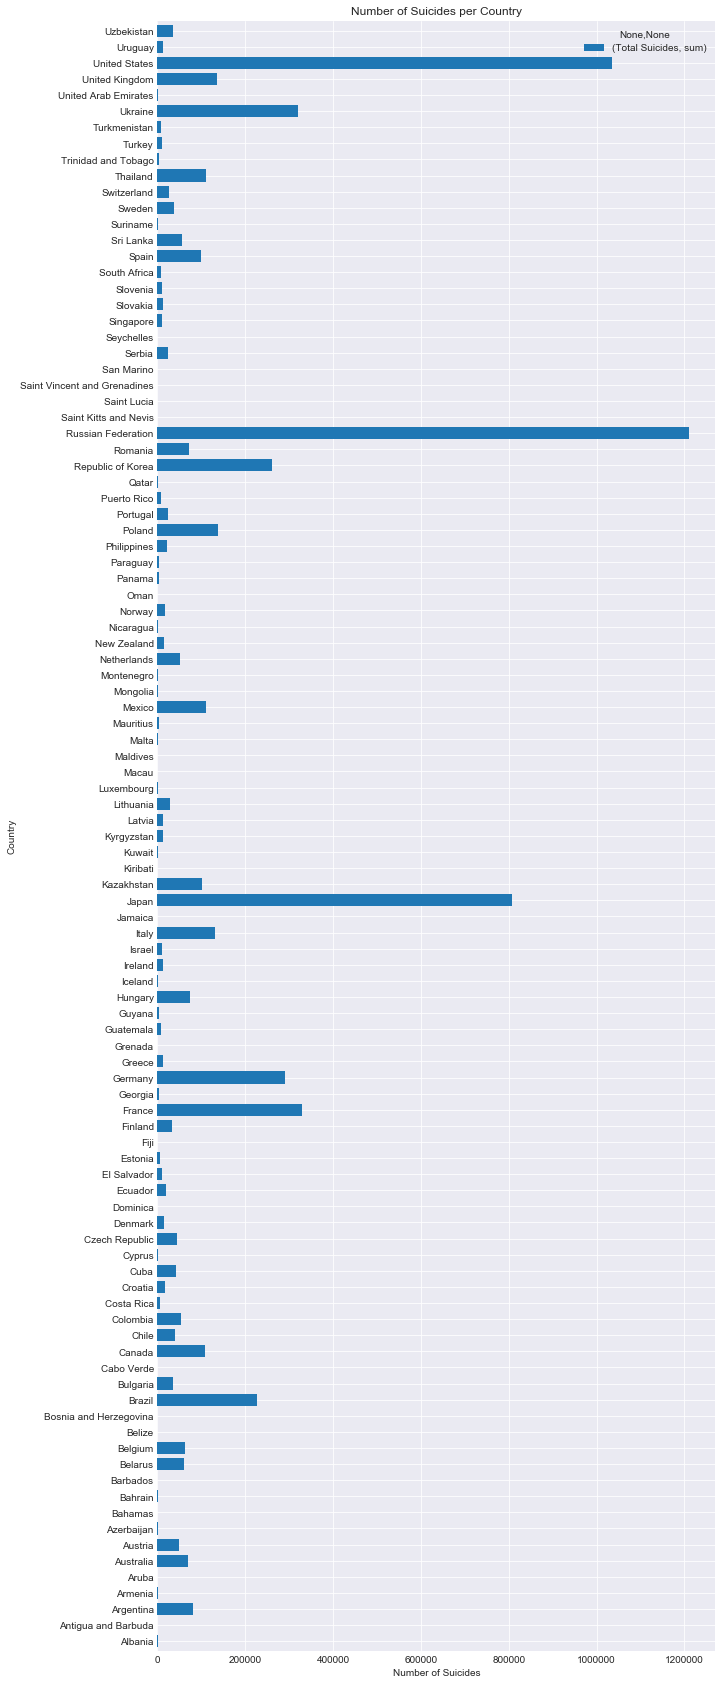

In [336]:
ax = final_df.groupby('Country').aggregate({"Total Suicides":['sum']}).plot(kind = 'barh', figsize = (10, 30), width = 0.75)

ax.set_title("Number of Suicides per Country")
ax.set_xlabel("Number of Suicides")
ax.set_ylabel("Country")

From the above graph, it can be seen that the Russian Federation, the United States, and Japan have the most suicides; interestingly, these are all countries that are regarded as international superpowers. It should be noted, however, that this does not yet take into account the populations of the countries; with regards to this, plotting the number of suicides for every 100000 people (i.e., using the "Average Suicides" column of the dataframe) may yield a more accurate analysis. 

Moreover, several countries have much fewer suicides; in fact, their numbers were small enough to be regarded as negligible when compared to the maximum value in the graph, which caused their data to no longer be plotted. However, there does not seem to be a strong trend related to these smaller amounts, as several countries from Europe, Asia, and South America share this trait.

To better compare the suicide rates with respect to the populations of the countries, the sum of the average suicides for all subgroups of each country are examined and displayed visually.

In [337]:
final_df.groupby('Country').aggregate({"Average Suicides":['sum']})

,Average Suicides
,sum
Country,
Albania,924.76
Antigua and Barbuda,179.14
Argentina,"3,894.59"
Armenia,976.21
Aruba,"1,596.52"
...,...
United Arab Emirates,94.89
United Kingdom,"2,790.92"


Text(0, 0.5, 'Country')

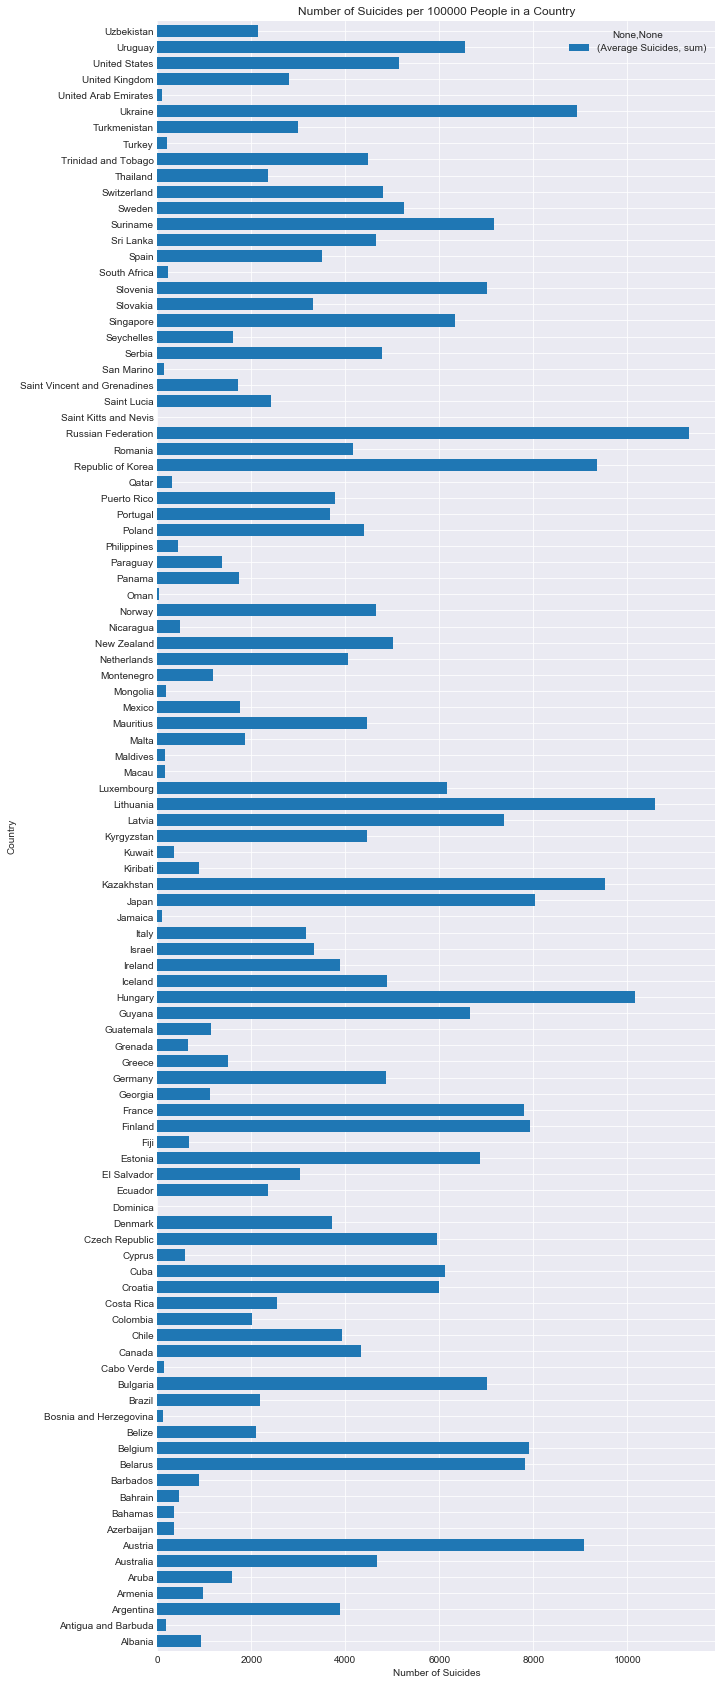

In [338]:
ax = final_df.groupby('Country').aggregate({"Average Suicides":['sum']}).plot(kind = 'barh', figsize = (10, 30), width = 0.75)

ax.set_title("Number of Suicides per 100000 People in a Country")
ax.set_xlabel("Number of Suicides")
ax.set_ylabel("Country")

In contrast to the earlier data, the countries with the highest average numbers of suicides have changed: while the Russian Federation still has the highest number of suicides, it is now closely followed by other countries in Central and Eastern Europe, such as Hungary, Austria, Lithuania, Ukraine, and Kazakhstan. However, there still appears to be no clear geographical correlation among the countries with the fewest numbers of suicides.

Moreover, as the data under the "Average Suicides" column already "standardizes" the numbers of suicides in relation to the populations of the countries, there is no longer a need to include the "Population" column in the analysis of the dataset. 

Apart from the relationship between the countries to their respective numbers of suicides, examining the relationships between sex, age, and year and the numbers of suicides may also yield pertinent correlations. As the comparisons no longer involve differences in national population, the total number of suicides is used instead of the average number of suicides.

As seen in the table and bar graph below, there are in total over thrice as many suicides by males compared to suicides by females.

In [339]:
final_df.groupby('Sex').aggregate({"Total Suicides":['sum']})

,Total Suicides
,sum
Sex,
female,1559510
male,5188910


Text(0, 0.5, 'Sex')

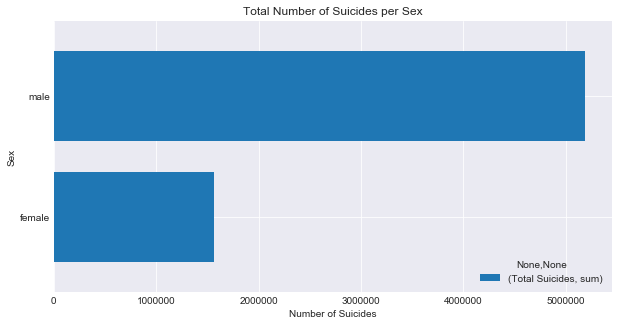

In [340]:
ax = final_df.groupby('Sex').aggregate({"Total Suicides":['sum']}).plot(kind = 'barh', figsize = (10, 5), width = 0.75)

ax.set_title("Total Number of Suicides per Sex")
ax.set_xlabel("Number of Suicides")
ax.set_ylabel("Sex")

As seen in the following table and rough visualization, most suicides fall under the ages of 35 to 74, while both the younger and older age ranges have smaller, but still significant, numbers of suicides. As each of the generations in the dataset corresponds to one of the six age ranges, no additional trends or correlations can be gleaned from comparisons with the "Generations" column.

<b>N.B.</b> As the visualization was created solely for faster data comparison, its bar ordering was not yet rearranged.

In [341]:
final_df.groupby('Age Range').aggregate({"Total Suicides":['sum']})

,Total Suicides
,sum
Age Range,
15-24 years,808542
25-34 years,1123912
35-54 years,2452141
5-14 years,52264
55-74 years,1658443
75+ years,653118


Text(0, 0.5, 'Age Range')

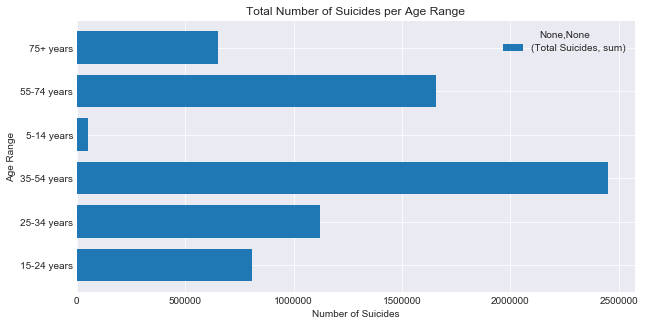

In [342]:
ax = final_df.groupby('Age Range').aggregate({"Total Suicides":['sum']}).plot(kind = 'barh', figsize = (10, 5), width = 0.75)

ax.set_title("Total Number of Suicides per Age Range")
ax.set_xlabel("Number of Suicides")
ax.set_ylabel("Age Range")

Moreover, there is a steady increase in the number of suicides over time; more recent years, especially the early 2000s and the 2010s, recorded significantly more suicides than the 1980s. A notable outlier is the data for 2016, with the least number of recorded suicides; however, this may be because the data was collected in early 2016, before all the data for the year was available. Thus, this outlier may not signify an anomaly in the overall trend.

In [343]:
final_df.groupby('Year').aggregate({"Total Suicides":['sum']})

,Total Suicides
,sum
Year,
1985,116063
1986,120670
1987,126842
1988,121026
1989,160244
1990,193361
1991,198020
1992,211473


Text(0, 0.5, 'Year')

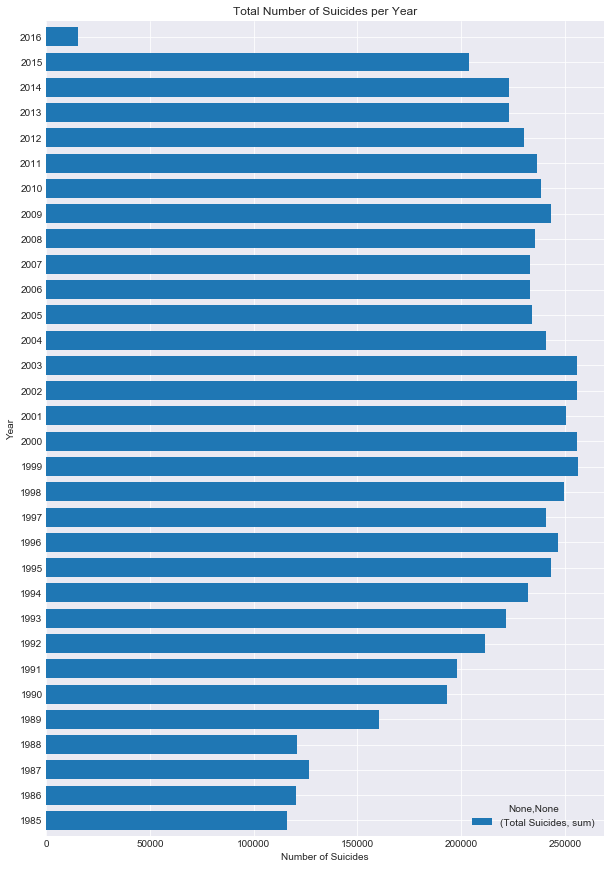

In [344]:
ax = final_df.groupby('Year').aggregate({"Total Suicides":['sum']}).plot(kind = 'barh', figsize = (10, 15), width = 0.75)

ax.set_title("Total Number of Suicides per Year")
ax.set_xlabel("Number of Suicides")
ax.set_ylabel("Year")

Another point of interest is the relationship between the countries' economic performances and their numbers of suicides. As GDP is an indicator of economic growth, countries with higher GDPs would be more capable of maintaining improved qualities of life. Thus, it is expected that higher GDPs would be correlated to lower numbers of suicides.

For the analysis involving the total numbers of suicides and the countries' GDPs, the sum of the total number of suicides for each subgroup is plotted against the mean of the GDPs of the country's subgroups.

In [345]:
final_df.groupby('Country').aggregate({"Total Suicides": ['sum'], "GDP": ['mean']})

,Total Suicides,GDP
,sum,mean
Country,,
Albania,1970,"5,211,661,212.14"
Antigua and Barbuda,11,"803,545,216.70"
Argentina,82219,"274,256,497,624.61"
Armenia,1905,"5,386,592,177.83"
Aruba,101,"2,196,223,463.79"
...,...,...
United Arab Emirates,622,"253,243,167,746.67"
United Kingdom,136805,"1,816,067,469,426.61"


Text(0, 0.5, 'Total Suicides')

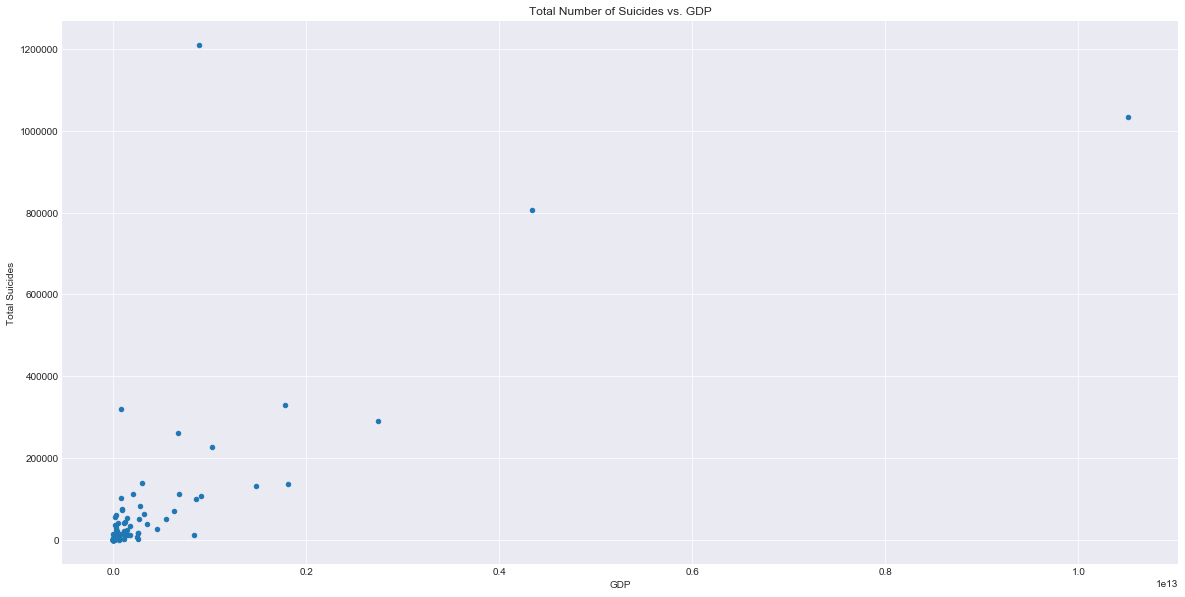

In [346]:
ax = final_df.groupby('Country').aggregate({"Total Suicides": ['sum'], "GDP": ['mean']}).plot(kind = 'scatter', x = "GDP", y = "Total Suicides", figsize = (20, 10))

ax.set_title("Total Number of Suicides vs. GDP")
ax.set_xlabel("GDP")
ax.set_ylabel("Total Suicides")

Contrary to the earlier hypothesis, as seen in the generated table and scatter plot visualization, higher GDPs actually appeared to correlate with higher numbers of suicides, notwithstanding some outliers. Thus, it can be inferred that a higher GDP does not necessarily equate to fewer suicides; in fact, the trends in the data appear to support the opposite correlation.

A common critique of using GDP values as data points is that this metric does not take into account the differences in populations of the countries involved. A commonly used similar metric that accommodates these differences is GDP per capita, which is equivalent to a country's GDP divided by its total population. Thus, the relationship between GDP per capita and total number of suicides is also examined.

In [347]:
final_df.groupby('Country').aggregate({"Total Suicides": ['sum'], "GDP Per Capita": ['mean']})

,Total Suicides,GDP Per Capita
,sum,mean
Country,,
Albania,1970,"1,859.05"
Antigua and Barbuda,11,"10,448.19"
Argentina,82219,"7,914.10"
Armenia,1905,"1,873.92"
Aruba,101,"24,221.64"
...,...,...
United Arab Emirates,622,"42,162.00"
United Kingdom,136805,"31,908.35"


Text(0, 0.5, 'Total Suicides')

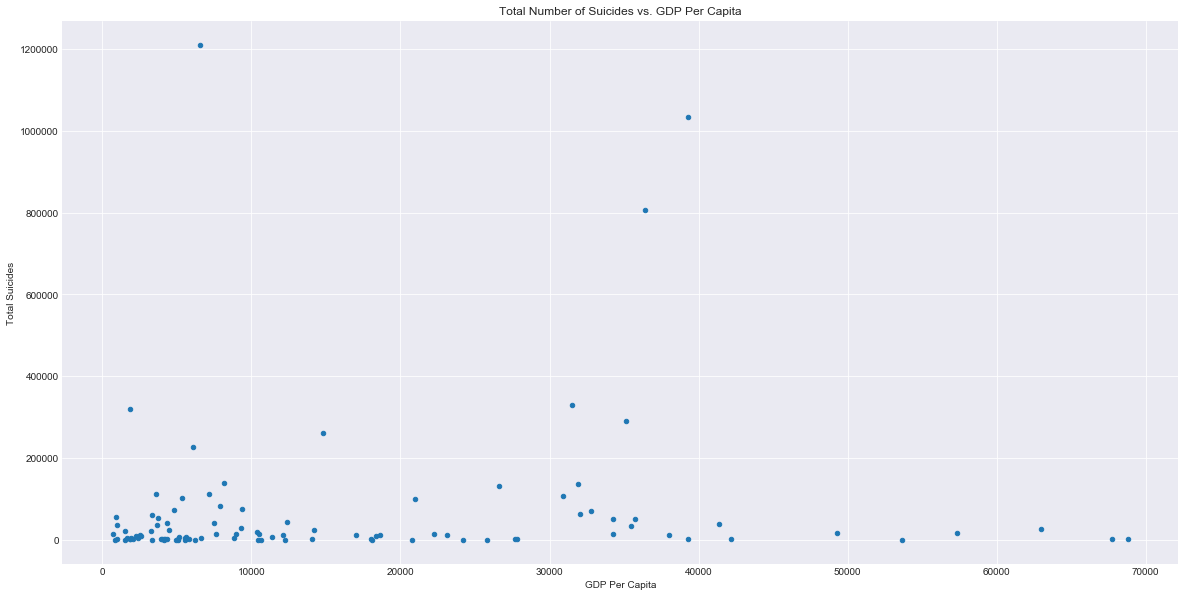

In [348]:
ax = final_df.groupby('Country').aggregate({"Total Suicides": ['sum'], "GDP Per Capita": ['mean']}).plot(kind = 'scatter', x = "GDP Per Capita", y = "Total Suicides", figsize = (20, 10))

ax.set_title("Total Number of Suicides vs. GDP Per Capita")
ax.set_xlabel("GDP Per Capita")
ax.set_ylabel("Total Suicides")

Similar to the earlier correlation, higher GDP per capita values also correspond to higher numbers of suicides for some data points, apart from some outliers. However, majority of the data points have relatively few suicides at different GDP per capita values. Hence, no strong correlations can be made between these two sets of values.

## Data Visualization

One of the most pertinent sets of information that can be gleaned from the dataset is the total number of suicides per country. To better highlight the differences in the numbers of suicides among the countries, their respective totals are sorted in descending order and presented in a bar graph.

In [349]:
totalsuicides = final_df.groupby('Country').aggregate({"Total Suicides":['sum']})
totalsuicides.columns = ['Total Suicides']
totalsuicides = totalsuicides.sort_values(by = 'Total Suicides')

(0, 1200000)

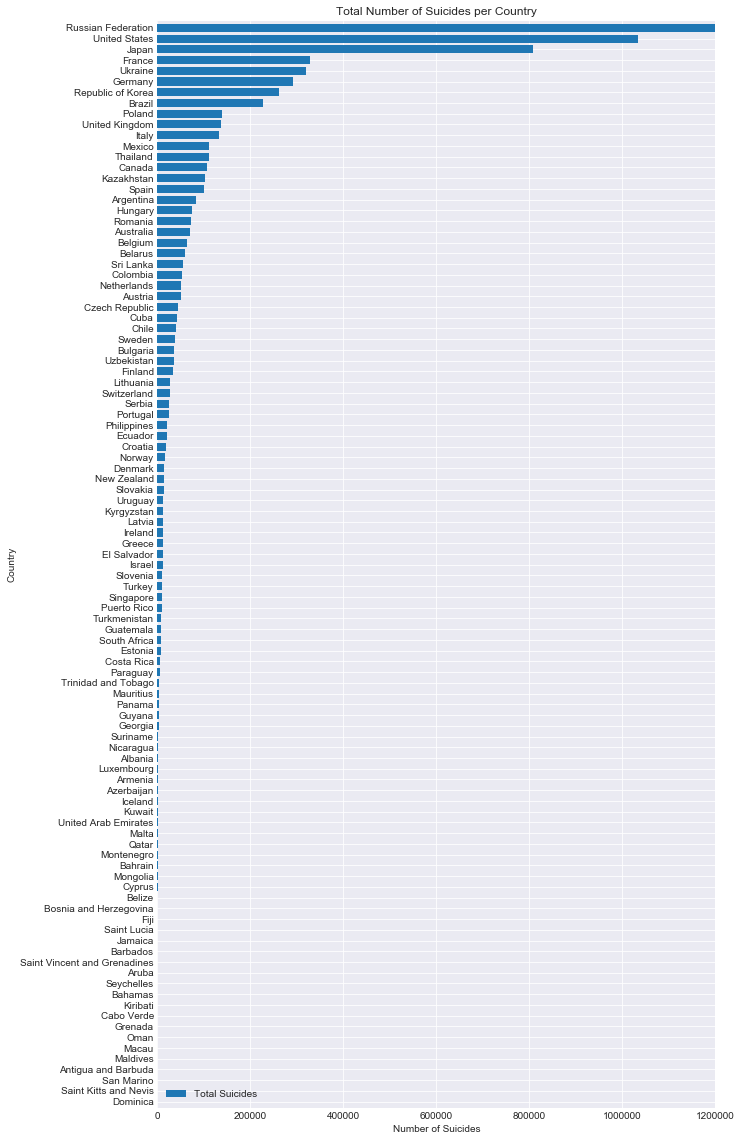

In [350]:
ax = totalsuicides.plot(kind = 'barh', width = 0.75, figsize = (10, 20))

ax.set_title('Total Number of Suicides per Country')
ax.set_xlabel('Number of Suicides')
ax.set_ylabel('Country')
ax.set_xlim(0, 1200000)

As mentioned in the Data Analysis section, the top three countries with the greatest total numbers of suicides are the Russian Federation, the United States, and Japan; the total number of suicides of the succeeding country, France, is significantly smaller than that of Japan. Moreover, several countries from Asia, South America, and Europe have almost negligible total numbers of suicides compared to the top three countries.

Similarly, the average number of suicides per country is collated, arranged, and represented in a bar graph.

In [351]:
avesuicides = final_df.groupby('Country').aggregate({"Average Suicides":['sum']})
avesuicides.columns = ['Average Suicides']
avesuicides = avesuicides.sort_values(by = 'Average Suicides')

(0, 11500)

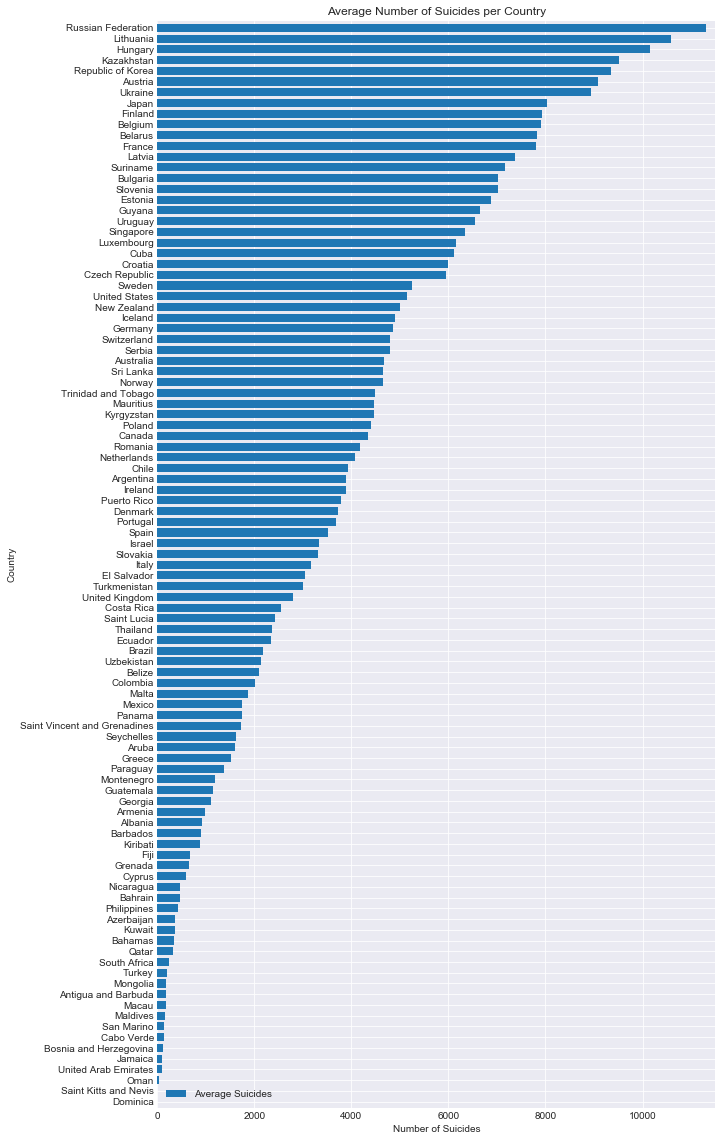

In [352]:
ax = avesuicides.plot(kind = 'barh', width = 0.75, figsize = (10, 20))

ax.set_title('Average Number of Suicides per Country')
ax.set_xlabel('Number of Suicides')
ax.set_ylabel('Country')
ax.set_xlim(0, 11500)

As previously mentioned, majority of the countries with the highest average numbers of suicides are Central and Eastern European countries; however, some Asian countries (i.e., Korea and Japan) and countries from other regions of Europe (i.e., Finland and Belgium) also rank among the top ten countries with the highest average numbers of suicides. A result of particular interest is the surprisingly high average amount of suicides of Finland, which has long been regarded as the happiest country in the world. 

Another notable observation is the correlation between sex and number of suicides, as highlighted using the pie plot below.

In [353]:
suicidesbysex = final_df.groupby('Sex').aggregate({"Total Suicides":['sum']})
suicidesbysex.columns = ['Total Suicides']

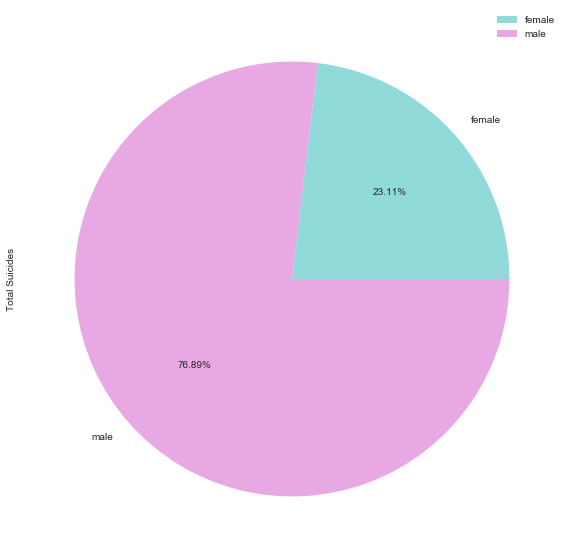

In [354]:
ax = suicidesbysex.plot(kind = 'pie', figsize = (10, 10), subplots = True, autopct = '%.2f%%', colors = ['#90DAD9', '#E7A8E3'])

Though there is no consistent ratio between the number of male and female suicides for each country, the number of male suicides is consistently greater than the number of female suicides. Altogether, male suicides make up over 75% of the suicides in the dataset, while female suicides contribute to less than 25% of the cases.

Apart from sex, the six age ranges noted in the dataset also contribute different amounts to the total number of suicides.

In [355]:
suicidesbygen = final_df.groupby('Age Range').aggregate({"Total Suicides":['sum']})
suicidesbygen.columns = ['Total Suicides']
suicidesbygen = suicidesbygen.sort_values(by = 'Total Suicides')

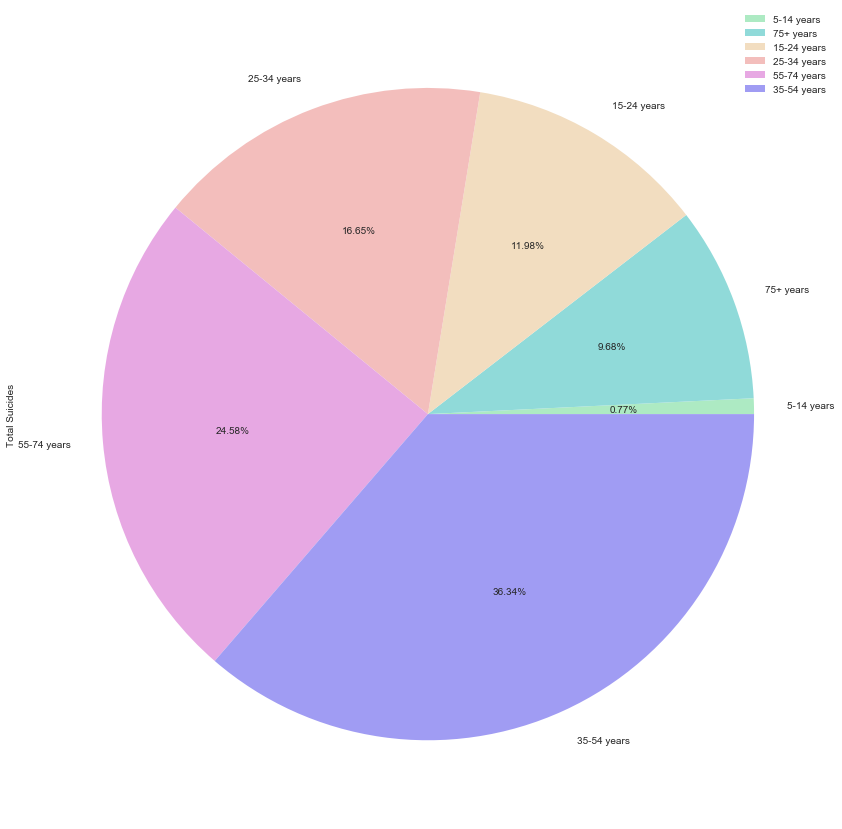

In [356]:
ax = suicidesbygen.plot(kind = 'pie', figsize = (15, 15), subplots = True, autopct = '%.2f%%', colors = ['#ADEAC3', '#90DAD9', '#F2DDC0', '#F3BEBC', '#E7A8E3', '#A09CF3'])

As seen in the pie plot, over 75% of suicides are committed by people between 25 to 74 years old. The age range with the largest contribution is the 35-54 year range, making up over a third of all suicides. The 55-74 year range is the second largest demographic, contributing to about a fourth of all suicides, and the 25-34 year range makes up about a sixth of all cases. Moreover, the age range with the smallest number of suicide cases is the 5-14 year range, comprising less than 1% of the total number of suicides. 

Additionally, there is a noticeable trend regarding the total numbers of suicides over the years.

In [357]:
suicidesbyyear = final_df.groupby('Year').aggregate({"Total Suicides":['sum']})
suicidesbyyear.columns = ['Total Suicides']

(1985, 2016)

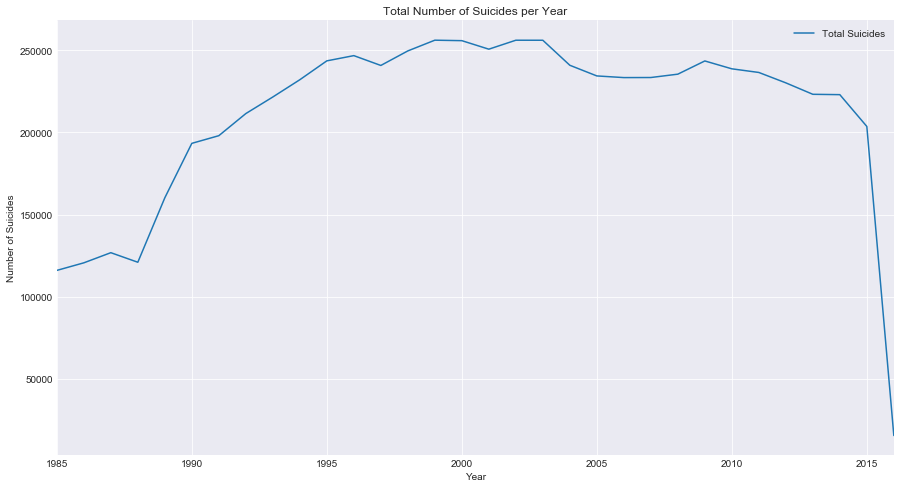

In [358]:
ax = suicidesbyyear.plot(kind = 'line', figsize = (15, 8))

ax.set_title('Total Number of Suicides per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Suicides')
ax.set_xlim(1985, 2016)

As seen in the line plot, there was an overall increase in the total number of suicides over the years, peaking at around the early 2000s. The mid-2000s then saw a significant decrease in the total number of suicides, with another peak during the late 2000s. After this second peak, the total number of suicides decreased overall, with the sharpest decrease seen in the year 2016. As described in the Data Analysis section, this drastic decrease may have been caused by a lack of data (and therefore, an error in the data collection process) rather than actual environmental factors.

Finally, there also exists a fairly strong correlation between a country's GDP and its total number of suicides, as represented through a scatterplot.

In [359]:
suicidesandgdp = final_df.groupby('Country').aggregate({"Total Suicides": ['sum'], "GDP": ['mean']})

(0, 11000000000000)

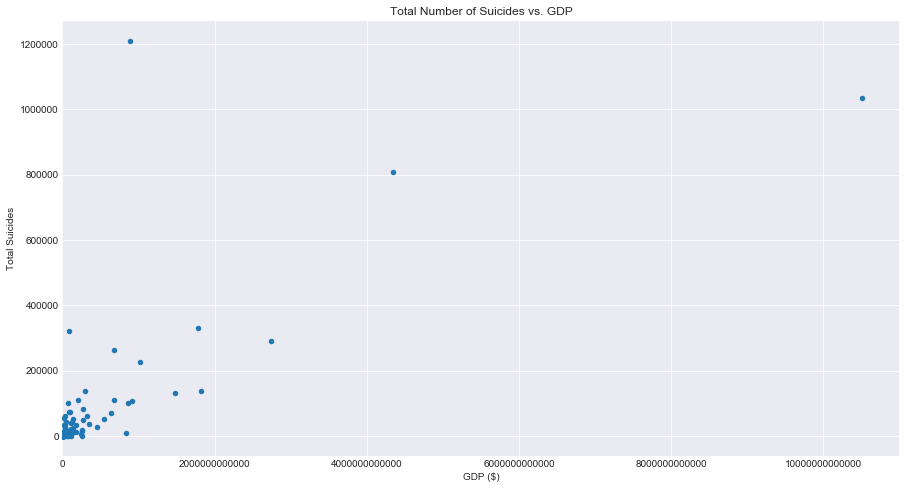

In [360]:
ax = suicidesandgdp.plot(kind = 'scatter', x = "GDP", y = "Total Suicides", figsize = (15, 8))

ax.ticklabel_format(style='plain', axis='x')
ax.set_title("Total Number of Suicides vs. GDP")
ax.set_xlabel("GDP ($)")
ax.set_ylabel("Total Suicides")
ax.set_xlim(0, 11000000000000)

Though there is one notable outlier in the dataset, the scatterplot of the remaining points reveals a correlation between the GDP and the total number of suicides of a country; that is, a higher GDP correlates to a higher number of total suicides. As the GDP is often regarded as a major indicator of the economic status of a country, this correlation could be interpreted to mean that more developed countries tend to have more suicide cases.